#  Machine Learning Foundations for Product Managers Course Project
### AI Product Management Specialization offered by Duke University
https://www.coursera.org/learn/machine-learning-foundations-for-product-managers

## Sumudu Tennakoon
<hr>

# Electrical energy output of a Combined Cycle Power Plant

This project aims to develop a predictive model for estimating the net hourly electrical energy output (PE) of a Combined Cycle Power Plant. This type of plant generates power through an integrated system comprising gas turbines, steam turbines, and heat recovery steam generators, which combine high thermal efficiency with high output performance.

The dataset used comprises 9,568 hourly records of ambient environmental conditions collected from power plant sensors. These readings serve as predictive features in our modeling process.

The columns in the data consist of hourly average ambient variables:
- Temperature (AT) in the range 1.81°C to 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)

## Data source:

* Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.

* Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"https://storage.googleapis.com/aipi_datasets/CCPP_data.csv"

data = pd.read_csv(file_path)

data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
data.describe(include="all")

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


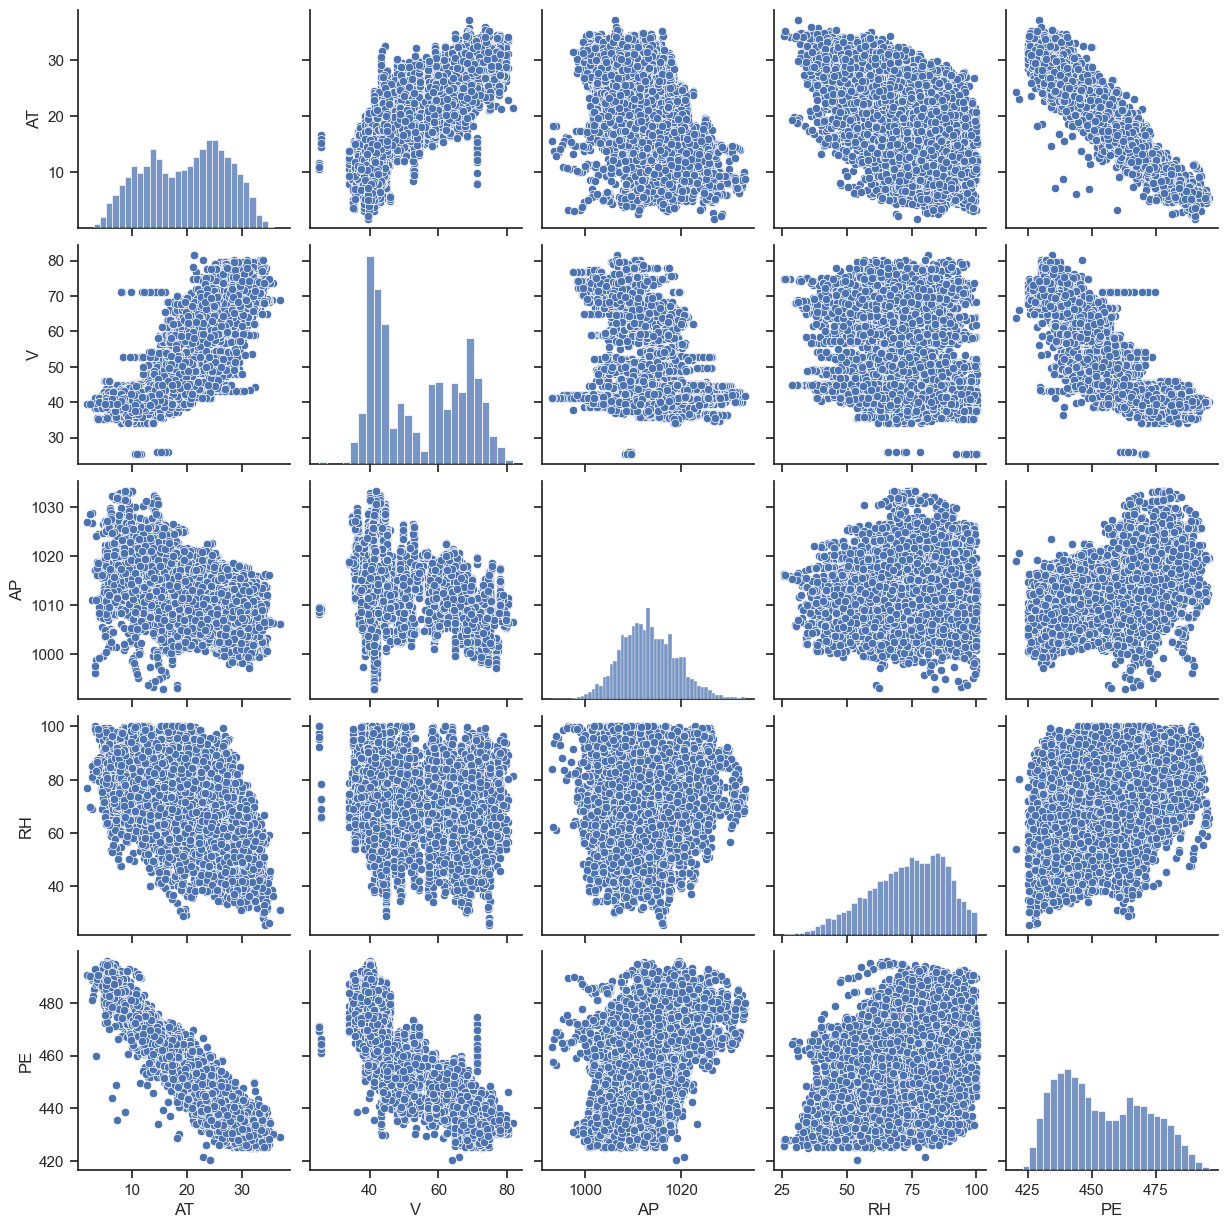

In [6]:
sns.set_theme(style="ticks")

sns.pairplot(data)

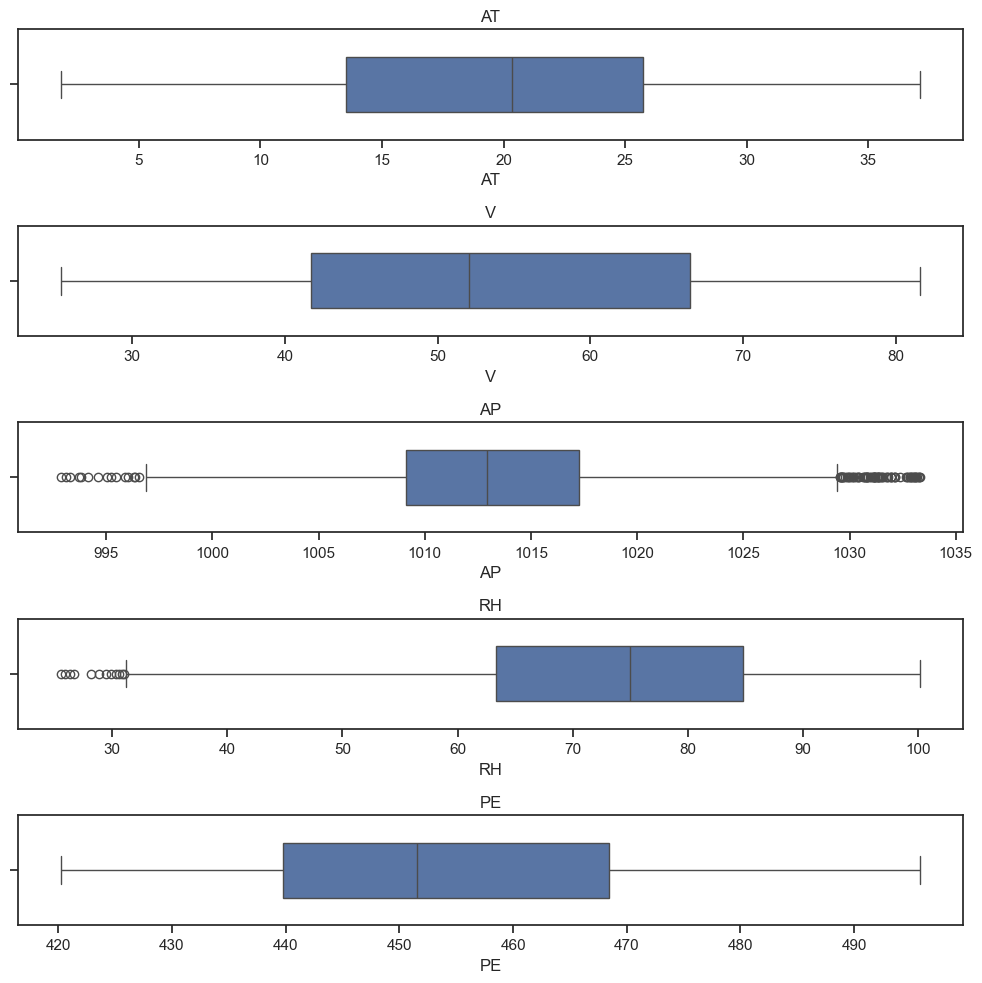

In [7]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 10)) 

for i, ax in enumerate(axes):
    sns.boxplot(data=data, x=data.columns[i], width=0.5, ax=ax)
    ax.set_title(data.columns[i])  # Optional: label each subplot

plt.tight_layout()
plt.show()

# Modeling approach
The goal is to predict the power plant’s net electrical output (PE) using four continuous features: Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH), and Exhaust Vacuum (V). This is a supervised regression task. 
This is a supervised regression task. 

I experimented with both raw and scaled versions of these variables to assess how feature scaling impacts performance. Based on the problem structure, I explored three algorithms:
- Linear Regression (baseline model)
- Elastic Net Regression (to handle potential multicollinearity)
- Random Forest Regression (to model nonlinear interactions).


# Model evaluation
Evaluation metrics were Mean Squared Error (MSE) to quantify prediction error, and R² score to understand variance explained by the model.



In [8]:
data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [9]:
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

# Data Pre-processing

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = [f"{col}_scaled" for col in features]
data[scaled_features] = scaler.fit_transform(data[features])
data

,AT,V,AP,RH,PE,AT_scaled,V_scaled,AP_scaled,RH_scaled
0,14.96,41.76,1024.07,73.17,463.26,-0.629519,-0.987297,1.820488,-0.009519
1,25.18,62.96,1020.04,59.08,444.37,0.741909,0.681045,1.141863,-0.974621
2,5.11,39.40,1012.16,92.14,488.56,-1.951297,-1.173018,-0.185078,1.289840
3,20.86,57.32,1010.24,76.64,446.48,0.162205,0.237203,-0.508393,0.228160
4,10.82,37.50,1009.23,96.62,473.90,-1.185069,-1.322539,-0.678470,1.596699
...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,-0.402737,-0.363242,0.126450,1.211755
9564,13.19,39.18,1023.67,66.78,469.62,-0.867037,-1.190331,1.753131,-0.447205
9565,31.32,74.33,1012.92,36.48,429.57,1.565840,1.575811,-0.057099,-2.522618
9566,24.48,69.45,1013.86,62.39,435.74,0.647976,1.191778,0.101191,-0.747901


# Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)

In [12]:
data_train.describe()

,AT,V,AP,RH,PE,AT_scaled,V_scaled,AP_scaled,RH_scaled
count,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000,6697.000000
mean,19.623823,54.234805,1013.233064,73.348343,454.408501,-0.003678,-0.005587,-0.004381,0.002696
std,7.418153,12.677564,5.947802,14.644214,17.043212,0.995447,0.997666,1.001571,1.003062
min,1.810000,25.360000,992.890000,26.300000,420.260000,-2.394126,-2.277901,-3.430019,-3.219902
25%,13.560000,41.740000,1009.070000,63.340000,439.910000,-0.817386,-0.988870,-0.705413,-0.682830
50%,20.340000,51.950000,1012.970000,75.010000,451.580000,0.092426,-0.185391,-0.048679,0.116512
75%,25.660000,66.510000,1017.250000,84.880000,468.270000,0.806321,0.960414,0.672045,0.792563
max,35.560000,81.560000,1033.300000,100.160000,495.760000,2.134808,2.144779,3.374760,1.839173


In [13]:
data_test.describe()

,AT,V,AP,RH,PE,AT_scaled,V_scaled,AP_scaled,RH_scaled
count,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000
mean,19.715165,54.471418,1013.319760,73.217154,454.263560,0.008579,0.013033,0.010218,-0.006289
std,7.532835,12.779040,5.918284,14.499367,17.124888,1.010836,1.005651,0.996600,0.993141
min,2.340000,25.360000,993.110000,25.560000,425.110000,-2.323005,-2.277901,-3.392973,-3.270589
25%,13.400000,41.720000,1009.170000,63.210000,439.355000,-0.838857,-0.990444,-0.688574,-0.691734
50%,20.350000,52.840000,1012.900000,74.830000,451.520000,0.093768,-0.115352,-0.060466,0.104183
75%,25.910000,66.560000,1017.275000,84.570000,468.785000,0.839868,0.964348,0.676255,0.771329
max,37.110000,79.740000,1033.250000,100.150000,495.350000,2.342804,2.001553,3.366340,1.838488


# First Model

In [14]:
from sklearn import linear_model

In [15]:
ols = linear_model.LinearRegression()
ols

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
ols.fit(data_train[features], data_train[target])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
ols.coef_

array([-2.00441576, -0.22712731,  0.04930096, -0.15997334])

In [18]:
ols.intercept_

np.float64(467.8414177274578)

In [19]:
data_test["PE_Predict"] = ols.predict(data_test[features])

<Axes: xlabel='PE', ylabel='PE_Predict'>

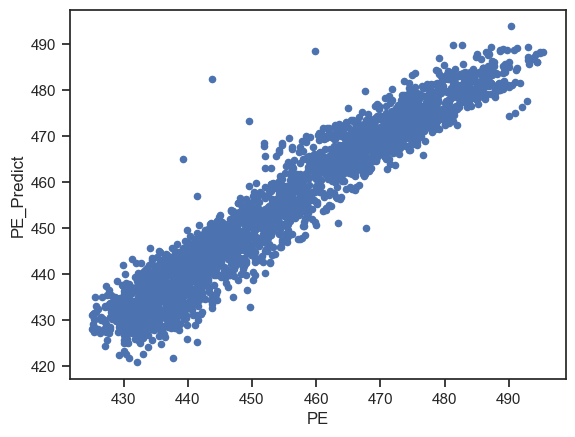

In [20]:
data_test.plot(kind="scatter", x=target, y="PE_Predict")

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

print("mean_squared_error: ", mean_squared_error(data_test[target] , data_test["PE_Predict"] ))
print("r2_score: ", r2_score(data_test[target] , data_test["PE_Predict"] ))

mean_squared_error:  21.239856938225497
r2_score:  0.9275484963869204


In [22]:
def train_linear_model(model, data_train, data_test, features, target):
    print(model)
    model.fit(data_train[features], data_train[target])
    model_params = pd.DataFrame({"feature": features, "coef":model.coef_})
    print(model_params)
    print("intercept:", model.intercept_)

    data_test["PE_Predict"] = model.predict(data_test[features])
    data_test.plot(kind="scatter", x=target, y="PE_Predict")

    print("mean_squared_error: ", mean_squared_error(data_test[target] , data_test["PE_Predict"] ))
    print("r2_score: ", r2_score(data_test[target] , data_test["PE_Predict"] ))

    return model

## Model with Raw Variables

### LinearRegression (OLS)

LinearRegression()
  feature      coef
0      AT -2.004416
1       V -0.227127
2      AP  0.049301
3      RH -0.159973
intercept: 467.8414177274578
mean_squared_error:  21.239856938225497
r2_score:  0.9275484963869204


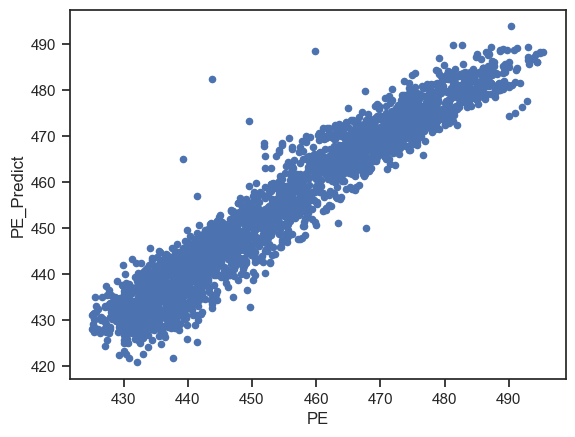

In [23]:
ols = linear_model.LinearRegression()
ols = train_linear_model(ols, data_train, data_test, features, target)

### ElasticNet

ElasticNet()
  feature      coef
0      AT -1.881277
1       V -0.272112
2      AP  0.066127
3      RH -0.136087
intercept: 449.0639627382806
mean_squared_error:  21.204551066081123
r2_score:  0.9276689286257378


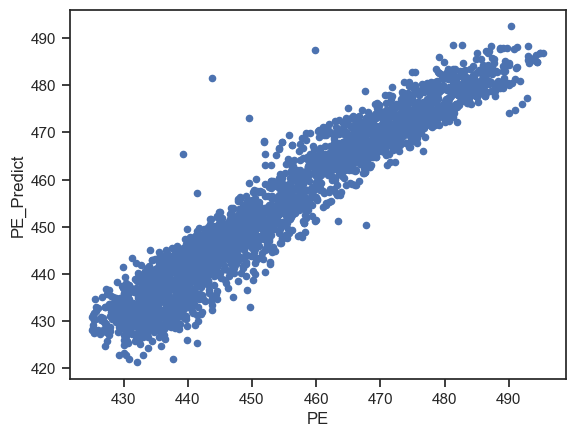

In [24]:
enr = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
enr = train_linear_model(enr, data_train, data_test, features, target)

## Model with Scaled Variables

### LinearRegression (OLS)

LinearRegression()
     feature       coef
0  AT_scaled -14.937074
1   V_scaled  -2.886159
2  AP_scaled   0.292772
3  RH_scaled  -2.335532
intercept: 454.34501673772496
mean_squared_error:  21.239856938225493
r2_score:  0.9275484963869204


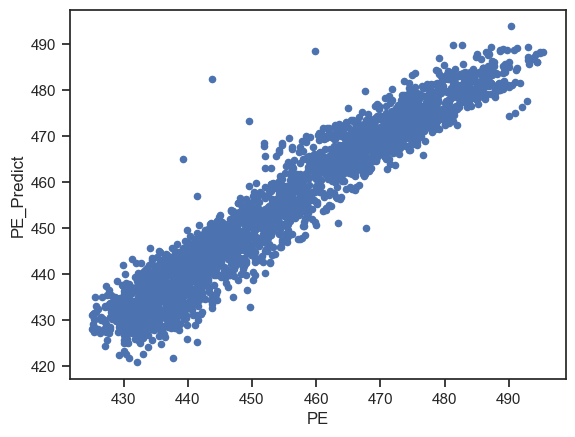

In [25]:
olss = linear_model.LinearRegression()
olss = train_linear_model(olss, data_train, data_test, scaled_features, target)

### ElasticNet

ElasticNet()
     feature      coef
0  AT_scaled -6.806007
1   V_scaled -5.152539
2  AP_scaled  1.760876
3  RH_scaled  0.471851
intercept: 454.3611213748684
mean_squared_error:  39.84215259627707
r2_score:  0.8640940063213438


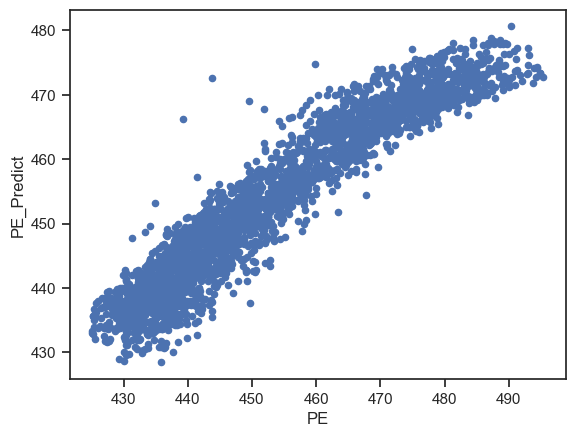

In [26]:
enrs = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
enrs = train_linear_model(enrs, data_train, data_test, scaled_features, target)

# Decision Tree Models

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def train_tree_model(model, data_train, data_test, features, target):
    model.fit(data_train[features], data_train[target])
    #model_params = pd.DataFrame({"feature": features, "coef":model.coef_})
    #print(model_params)
    #print("intercept:", model.intercept_)

    feature_importances = pd.DataFrame({"feature": features, "importance": model.feature_importances_})
    print(feature_importances)

    data_test["PE_Predict"] = model.predict(data_test[features])
    data_test.plot(kind="scatter", x=target, y="PE_Predict")

    print("mean_squared_error: ", mean_squared_error(data_test[target] , data_test["PE_Predict"] ))
    print("r2_score: ", r2_score(data_test[target] , data_test["PE_Predict"] ))
    return model

# DecisionTreeRegressor

  feature  importance
0      AT    0.966567
1       V    0.033433
2      AP    0.000000
3      RH    0.000000
mean_squared_error:  27.133632153671627
r2_score:  0.9074441765904873


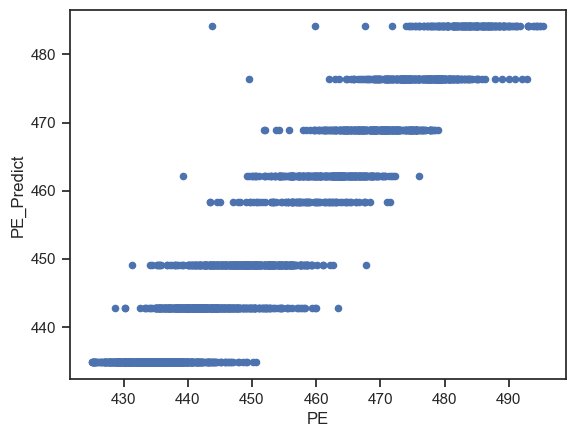

In [28]:
tr = DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=5)
tr = train_tree_model(tr, data_train, data_test, features, target)

# Visualize Tree

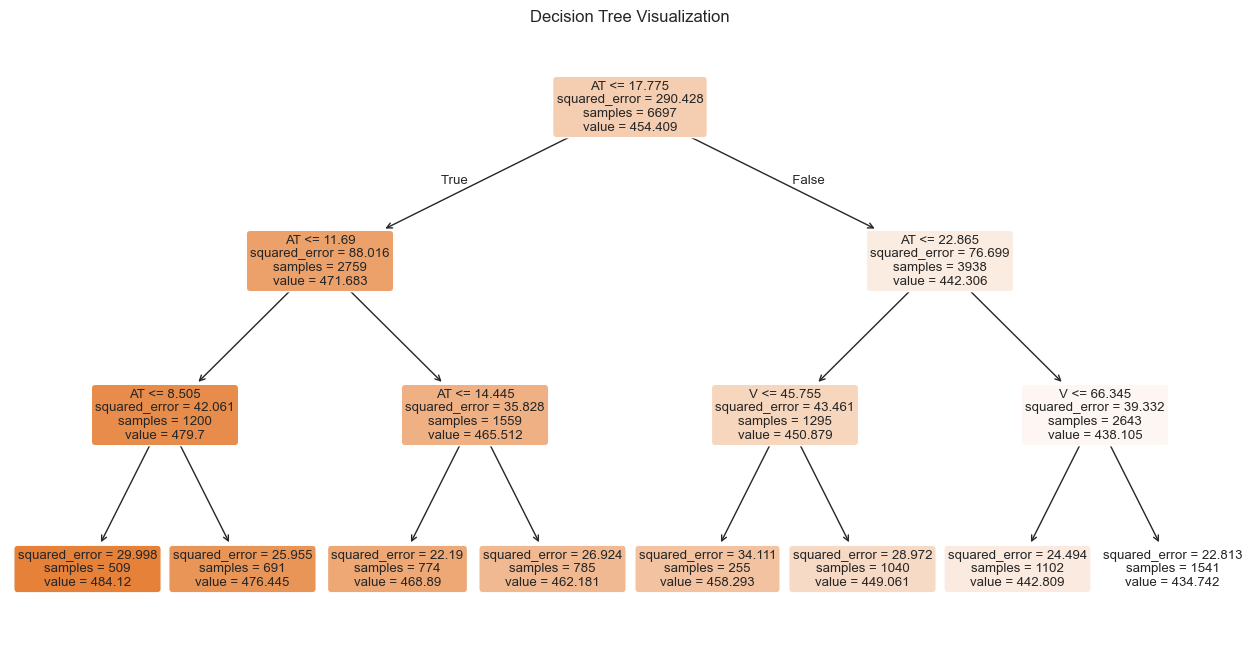

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))
plot_tree(tr, filled=True, feature_names=features, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

  feature  importance
0      AT    0.953957
1       V    0.039802
2      AP    0.002027
3      RH    0.004214
mean_squared_error:  20.15442109037446
r2_score:  0.9312510382393004


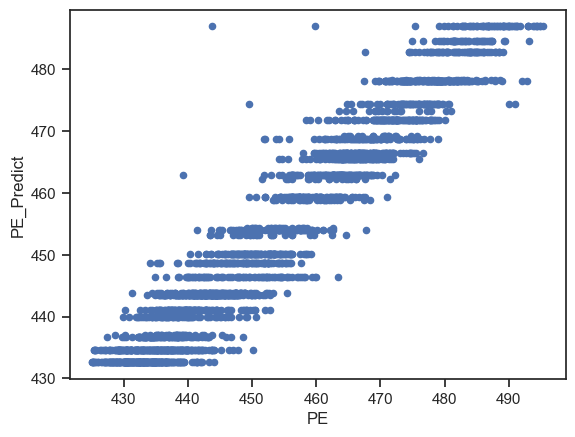

In [30]:
tr = DecisionTreeRegressor(max_depth=5, min_samples_split=100, min_samples_leaf=50)
tr = train_tree_model(tr, data_train, data_test, features, target)

### Ensemble Model: Random Forest Regression

  feature  importance
0      AT    0.979601
1       V    0.020399
2      AP    0.000000
3      RH    0.000000
mean_squared_error:  34.474091516898866
r2_score:  0.8824050569945643


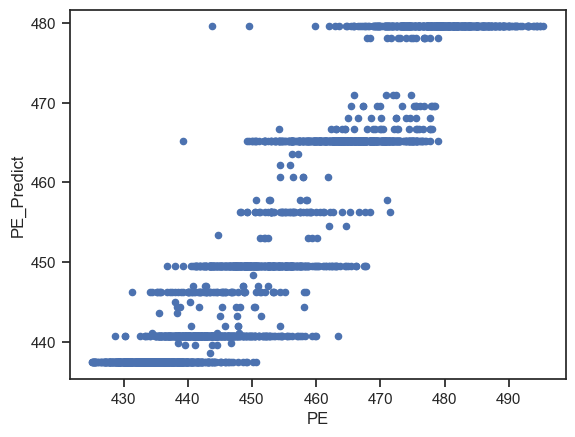

In [31]:
rfr_10_2 = RandomForestRegressor(n_estimators=10, max_depth=2)
rfr_10_2 = train_tree_model(rfr_10_2, data_train, data_test, features, target)

  feature  importance
0      AT    0.938864
1       V    0.053975
2      AP    0.002333
3      RH    0.004828
mean_squared_error:  18.433258274304777
r2_score:  0.9371221151655648


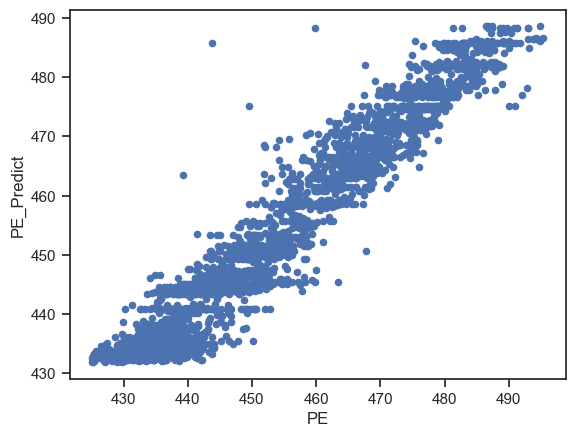

In [32]:
rfr_10_5 = RandomForestRegressor(n_estimators=10, max_depth=5)
rfr_10_5 = train_tree_model(rfr_10_5, data_train, data_test, features, target)

  feature  importance
0      AT    0.948321
1       V    0.045020
2      AP    0.001877
3      RH    0.004782
mean_squared_error:  18.162504068618116
r2_score:  0.9380456877380458


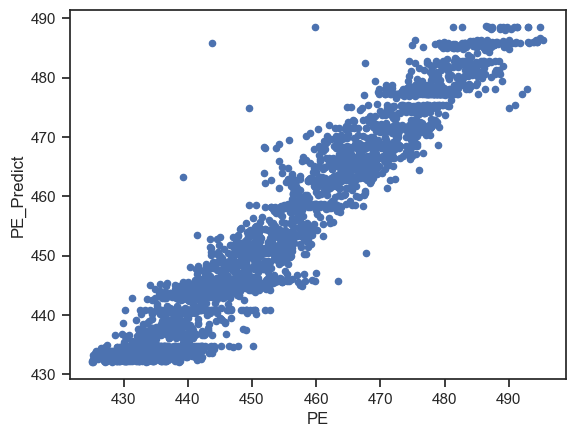

In [33]:
rfr_50_5 = RandomForestRegressor(n_estimators=50, max_depth=5)
rfr_50_5 = train_tree_model(rfr_50_5, data_train, data_test, features, target)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def train_tree_model_cv(model, data_train, data_test, features, target):

    model.fit(data_train[features], data_train[target])

    neg_mse_scores = cross_val_score(
        model, data_train[features], data_train[target], cv=5, scoring='neg_mean_squared_error'  #https://stackoverflow.com/questions/69956240/interpretation-of-neg-mean-squared-error
    )

    feature_importances = pd.DataFrame({"feature": features, "importance": model.feature_importances_})
    print(feature_importances)

    data_test["PE_Predict"] = model.predict(data_test[features])
    data_test.plot(kind="scatter", x=target, y="PE_Predict")

    print("neg_mse_scores: ", neg_mse_scores)
    print("mean_squared_error: ", mean_squared_error(data_test[target] , data_test["PE_Predict"] ))
    print("r2_score: ", r2_score(data_test[target] , data_test["PE_Predict"] ))
    return model

  feature  importance
0      AT    0.947693
1       V    0.045221
2      AP    0.002507
3      RH    0.004580
neg_mse_scores:  [-18.54833767 -17.50320603 -15.58507761 -19.4603945  -17.53136627]
mean_squared_error:  18.10773909906409
r2_score:  0.9382324971125652


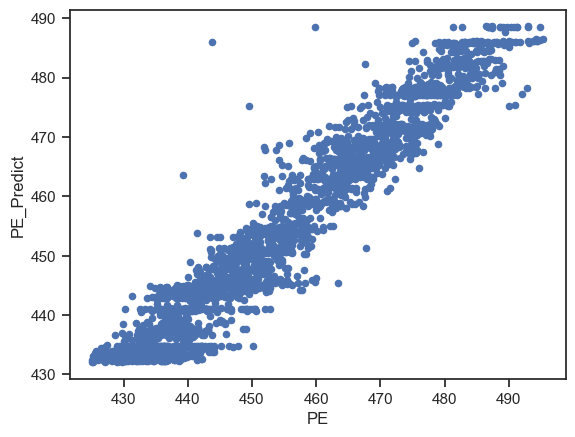

In [35]:
rfr_50_5 = RandomForestRegressor(n_estimators=50, max_depth=5)
rfr_50_5 = train_tree_model_cv(rfr_50_5, data_train, data_test, features, target)

# Model building and Seraching Best Set of hyper-parameters /with Grid Search
I trained each model using 5-fold cross-validation to ensure reliable performance estimates.
For the Random Forest model, I tuned the number of trees and maximum depth to avoid overfitting. The Elastic Net model's alpha and l1_ratio were selected using grid search.
All models were evaluated on the same feature space, using both raw and standardized inputs, to ensure a fair comparison of algorithmic capability rather than data preprocessing effects.

## Grid Serach : ElasticNet

### Hyper-paramaters

**alpha:**: Regularization stewngth
- Higher values more regularization, coefficients shrink more, may reduce overfitting, risks underfitting.
- Lower values: less regularization, coefficients stay closer to ordinary least squares (OLS), may fit training data better, risks overfitting.

**l1_ratio:** l1:l2 ratio
- l1_ratio = 1.0 is pure Lasso regression (only L1 penalty).
- l1_ratio = 0.0 is pure Ridge regression (only L2 penalty).
- l1_ratio = 0.5 is equal blend of both.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Create Model Object
model = ElasticNet()

# Model Hyperparameter Grid
param_grid = {
    'alpha': [0.01, 0.05, 0.1, 1.0, 5.0, 10.0],
    'l1_ratio': [0.0, 0.1, 0.25, 0.5, 0.75, 1.0],
    'max_iter':[1000, 5000, 10000]
}

# Create Grid Search Object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# E=Run Grid Search 
grid_search.fit(data_train[features], data_train[target])

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best CV score [negative MSE]:", grid_search.best_score_)

# Select Best Model
best_model = grid_search.best_estimator_
data_test["PE_Predict"] = best_model.predict(data_test[features])

print("Evaluation on Test Data")
print("mean_squared_error: ", mean_squared_error(data_test[target] , data_test["PE_Predict"] ))
print("r2_score: ", r2_score(data_test[target] , data_test["PE_Predict"] ))

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.25, 'max_iter': 1000}
Best CV score [negative MSE]: -20.63013515135205
Evaluation on Test Data
mean_squared_error:  21.237910483317275
r2_score:  0.9275551359601165


### GridSearch Results

In [37]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.026600,0.012518,0.002377,0.001329,0.01,0.00,1000,"{'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 1...",-21.093100,-21.351950,-18.837596,-22.343751,-19.524386,-20.630157,1.273398,16
1,0.164695,0.120251,0.002614,0.000581,0.01,0.00,5000,"{'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 5...",-21.093100,-21.351950,-18.837596,-22.343751,-19.524386,-20.630157,1.273398,18
2,0.453314,0.071914,0.001917,0.000653,0.01,0.00,10000,"{'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 1...",-21.093100,-21.351950,-18.837596,-22.343751,-19.524386,-20.630157,1.273398,16
3,0.007603,0.003661,0.003312,0.001176,0.01,0.10,1000,"{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 1...",-21.092699,-21.352137,-18.837235,-22.344182,-19.524481,-20.630147,1.273591,10
4,0.002087,0.000813,0.000713,0.000619,0.01,0.10,5000,"{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 5...",-21.092699,-21.352137,-18.837235,-22.344182,-19.524481,-20.630147,1.273591,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.003588,0.000437,0.001944,0.000393,10.00,0.75,5000,"{'alpha': 10.0, 'l1_ratio': 0.75, 'max_iter': ...",-28.514166,-27.482436,-26.379908,-27.970294,-26.024461,-27.274253,0.940960,94
104,0.003544,0.000456,0.002101,0.000524,10.00,0.75,10000,"{'alpha': 10.0, 'l1_ratio': 0.75, 'max_iter': ...",-28.514166,-27.482436,-26.379908,-27.970294,-26.024461,-27.274253,0.940960,94
105,0.004212,0.000523,0.004737,0.006717,10.00,1.00,1000,"{'alpha': 10.0, 'l1_ratio': 1.0, 'max_iter': 1...",-27.702495,-26.927531,-25.567399,-27.235134,-25.477103,-26.581932,0.900189,91
106,0.003808,0.000240,0.001668,0.000700,10.00,1.00,5000,"{'alpha': 10.0, 'l1_ratio': 1.0, 'max_iter': 5...",-27.702495,-26.927531,-25.567399,-27.235134,-25.477103,-26.581932,0.900189,91


## Grid Search : Random Forest

### Hyper-paramaters
**n_estimators:** number of individual decision trees are in the model.
- Lower values: quicker training, but more sensitive to data quirks (higher variance).
- Higher values: more robust predictions due to averaging across trees, though it takes more time and computing power.

**max_depth:** how deep each tree is allowed to grow.
- Lower values: Shallow trees, simpler logic, less risk of overfitting, but may miss complex patterns.
- Higher values: Deep trees, able to capture intricate patterns, but may also capture noise, leading to overfitting.

**min_samples_split:** smallest group size a node must have before it's allowed to split.
- Lower values: very flexible trees that split easily, potentially chasing noise.
- Higher values: more disciplined trees that only split when there’s enough data, improving generalization.

**min_samples_leaf:** fewest data points allowed in a leaf (end node of the tree).
- Lower values: more fine-grained modeling, but could make the model fragile to variations.
- Higher values: smoother, more general decisions that reduce overfitting.

In [38]:
from sklearn.model_selection import GridSearchCV

# Create Model Object
model = RandomForestRegressor()

# Model Hyperparameter Grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 5]
}

# Create Grid Search Object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# E=Run Grid Search 
grid_search.fit(data_train[features], data_train[target])

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best CV score [negative MSE]:", grid_search.best_score_)

# Select Best Model
best_model = grid_search.best_estimator_
data_test["PE_Predict"] = best_model.predict(data_test[features])

print("Evaluation on Test Data")
print("mean_squared_error: ", mean_squared_error(data_test[target] , data_test["PE_Predict"] ))
print("r2_score: ", r2_score(data_test[target] , data_test["PE_Predict"] ))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best CV score [negative MSE]: -17.595920280839703
Evaluation on Test Data
mean_squared_error:  18.179462748763402
r2_score:  0.9379878398024691


### GridSearch Results

In [39]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050032,0.006800,0.004921,0.004336,2,2,2,10,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",-35.239343,-32.918818,-33.401830,-38.791717,-38.085405,-35.687423,2.386497,23
1,0.251771,0.016702,0.005320,0.000749,2,2,2,50,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",-34.224663,-33.330792,-33.462647,-33.690723,-37.180439,-34.377853,1.434158,16
2,0.542551,0.021795,0.012007,0.000988,2,2,2,100,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",-34.473947,-33.246223,-32.818584,-34.811301,-38.369673,-34.743946,1.958240,18
3,0.061461,0.007941,0.003508,0.001584,2,2,5,10,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",-33.430312,-33.615690,-32.147058,-36.203087,-40.161956,-35.111621,2.847821,21
4,0.257827,0.013310,0.006035,0.001826,2,2,5,50,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",-33.845800,-32.792457,-32.356149,-34.314478,-38.698438,-34.401464,2.260643,17
5,0.547125,0.019986,0.013368,0.001873,2,2,5,100,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s...",-33.599693,-32.826976,-33.394993,-34.220104,-37.825232,-34.373400,1.782469,15
6,0.052173,0.004540,0.002509,0.000455,2,5,2,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",-35.335386,-33.834293,-36.461627,-33.631421,-37.539908,-35.360527,1.502129,22
7,0.255614,0.008016,0.005321,0.000508,2,5,2,50,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",-33.108414,-32.733443,-33.901455,-33.589434,-37.362531,-34.139055,1.660560,14
8,0.545934,0.029629,0.009986,0.001808,2,5,2,100,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",-34.943188,-32.892369,-32.861724,-34.307676,-38.956117,-34.792215,2.233019,19
9,0.053298,0.006012,0.004420,0.002000,2,5,5,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'min_s...",-33.489881,-35.112644,-35.451251,-33.571822,-42.012542,-35.927628,3.143557,24



# Model Evlaution Reuslts
- The Random Forest model outperformed the others, achieving the lowest cross-validated MSE and the highest R² score, confirming its effectiveness in capturing complex feature interactions.
- Linear and Elastic Net performed reasonably.


# Model interpretation
- In the Random Forest, Temperature emerged as the most important predictor, foolowed by Exhaust Vacuum.
- Cross-validated predictions showed consistent performance across all folds, indicating model predeiction is resonably generalized.


<hr/>
Last update 2025-06-20 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.